In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import joblib

In [2]:
df=pd.read_csv("D:\mentorness- ML intern\salary detection\Salary Prediction of Data Professions.csv")

In [3]:
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [4]:
df.shape

(2639, 13)

In [5]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [7]:
df.value_counts('DESIGNATION')

DESIGNATION
Analyst           1949
Senior Analyst     356
Associate          159
Manager             81
Senior Manager      62
Director            32
Name: count, dtype: int64

In [8]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [9]:
df.duplicated().sum()


161

In [10]:
df[df.duplicated()]

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
104,CARI,ARENALES,F,04-10-2014,01-07-2016,Senior Analyst,28.0,66338,Web,24.0,6.0,3.0,5
248,BOBBIE,AIDT,M,6-29-2013,01-07-2016,Senior Analyst,25.0,68505,Operations,15.0,15.0,3.0,1
400,JUAN,ABBASSI,M,07-01-2013,01-07-2016,Senior Analyst,27.0,61575,Finance,20.0,10.0,2.0,1
422,JODIE,ANIELLO,F,10-29-2014,01-07-2016,Analyst,24.0,43137,IT,27.0,3.0,2.0,2
446,ALEX,ABOLAFIA,M,11-10-2013,01-07-2016,Analyst,25.0,43352,Finance,27.0,3.0,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,ROMEO,AINSLEY,M,11-20-2014,01-07-2016,Analyst,23.0,41052,IT,15.0,15.0,5.0,1
2591,ROYCE,AGOSTO,M,06-07-2014,01-07-2016,Analyst,24.0,48651,Web,27.0,3.0,5.0,1
2600,SHEREE,APPEL,F,9-24-2013,01-07-2016,Analyst,25.0,49559,Management,22.0,8.0,5.0,2
2624,JOSPEH,ALLIS,M,2-26-2014,01-07-2016,Analyst,22.0,45364,Web,20.0,10.0,2.0,0


In [11]:
df.describe(percentiles=None, include=None, exclude=None)

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [12]:
df.select_dtypes(exclude='object').corr()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
AGE,1.000000,0.872213,0.007825,-0.006515,0.036801,0.903926
SALARY,0.872213,1.000000,0.006498,-0.005422,0.020248,0.854046
LEAVES USED,0.007825,0.006498,1.000000,-1.000000,0.002200,0.008601
LEAVES REMAINING,-0.006515,-0.005422,-1.000000,1.000000,-0.003415,-0.006728
RATINGS,0.036801,0.020248,0.002200,-0.003415,1.000000,0.040123
PAST EXP,0.903926,0.854046,0.008601,-0.006728,0.040123,1.000000


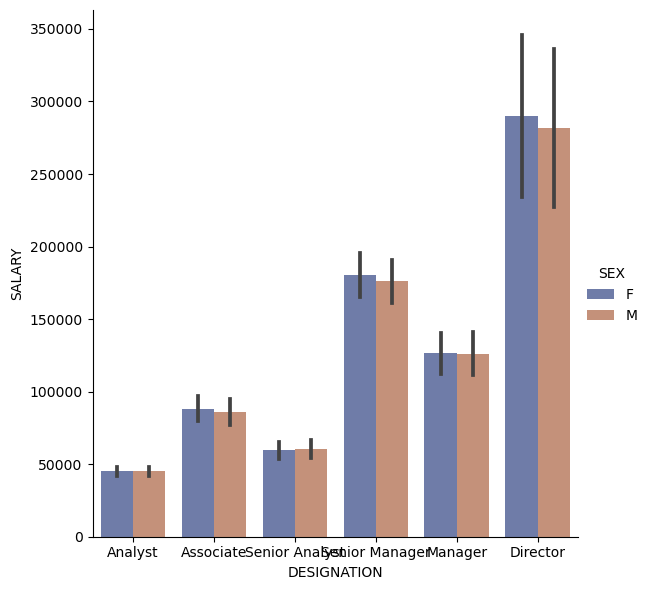

In [13]:
sns.catplot(
    data=df, kind="bar",
    x='DESIGNATION', y="SALARY", hue="SEX",
    errorbar="sd", palette="dark", alpha=.6, height=6)

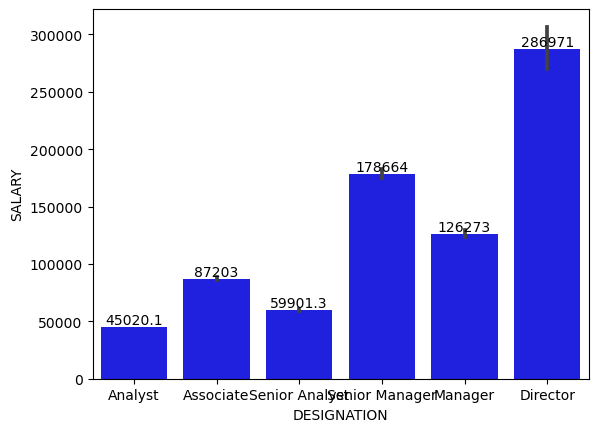

In [14]:
ax=sns.barplot(x='DESIGNATION', y="SALARY", data=df,
            label="Salary Differencee", color="b")

for i in ax.containers:
    ax.bar_label(i,)

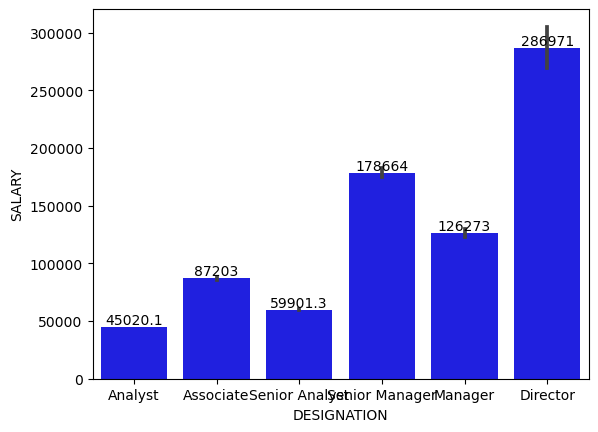

In [15]:
graph=sns.barplot(x='DESIGNATION', y="SALARY", data=df,
            label="Salary Differencee", color="b")

for i in graph.containers:
    graph.bar_label(i,)

<Axes: xlabel='DESIGNATION', ylabel='SALARY'>

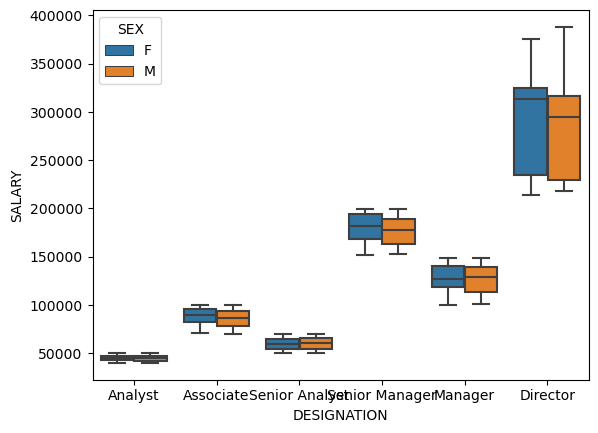

In [16]:
sns.boxplot(
    data=df,x='DESIGNATION', y="SALARY", hue="SEX")

(array([1175.,  875.,  288.,   60.,   89.,   71.,   24.,   34.,    9.,
          11.]),
 array([21. , 23.4, 25.8, 28.2, 30.6, 33. , 35.4, 37.8, 40.2, 42.6, 45. ]),
 <BarContainer object of 10 artists>)

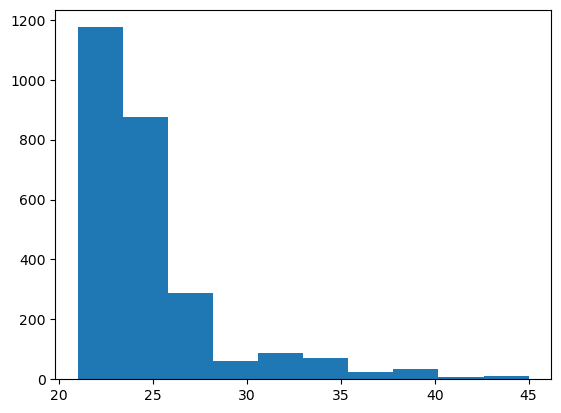

In [17]:
plt.hist(df['AGE'])

<Axes: xlabel='PAST EXP', ylabel='SEX'>

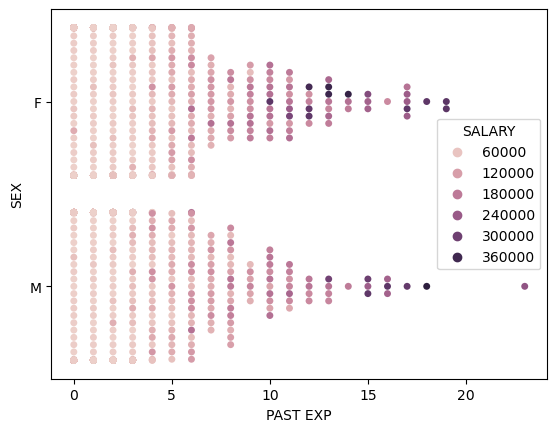

In [18]:
sns.swarmplot(data=df, x="PAST EXP", y="SEX", hue="SALARY")


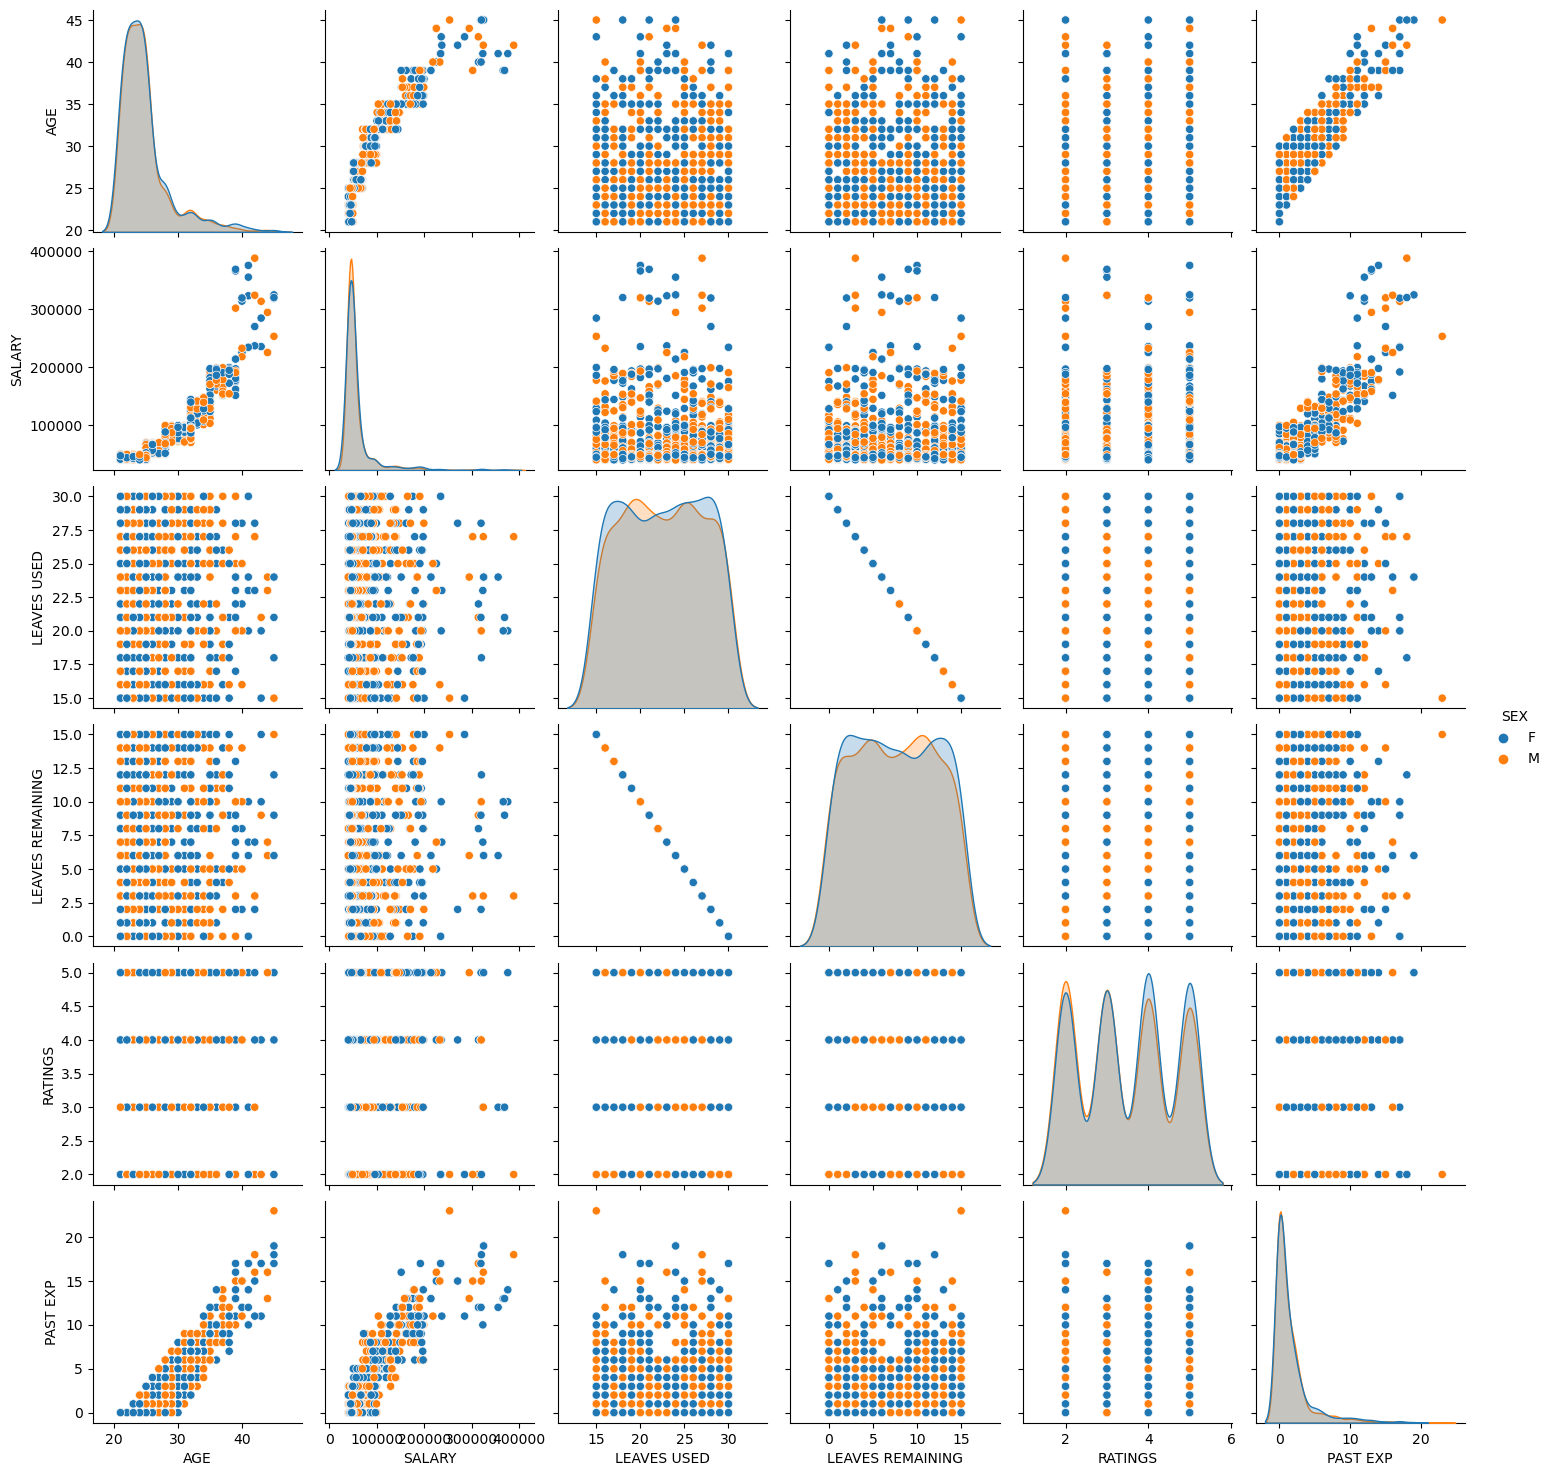

In [19]:
sns.pairplot(df, hue="SEX")

In [20]:
#DOJ ve salary, age and salary arasindaki elaqeye de bax

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.dropna(inplace=True)

In [23]:
df.head()


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1


In [24]:
df['DOJ']=pd.to_datetime(df['DOJ']).dt.strftime('%d-%m-%Y')
df['DOJ']=pd.to_datetime(df['DOJ'])

In [25]:
df['CURRENT DATE']=pd.to_datetime(df['CURRENT DATE'])

In [26]:
df['EXP']=(df['CURRENT DATE'] - df['DOJ']) / np.timedelta64(1, 'W')/52
df['EXP']=df['EXP'].round(0)

In [27]:
df[['AGE','LEAVES USED', 'LEAVES REMAINING', 'RATINGS','EXP']]=df[['AGE','LEAVES USED', 'LEAVES REMAINING', 'RATINGS','EXP']].astype('int64')

In [28]:
df['TOTAL EXP']=df['PAST EXP']+df['EXP']

In [29]:
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,EXP,TOTAL EXP
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21,44570,Finance,24,6,2,0,2,2
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21,40955,Finance,23,7,3,0,1,1
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22,45550,IT,22,8,3,0,3,3
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22,40339,Marketing,19,11,5,0,2,2
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28,63478,Operations,20,10,3,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,2011-06-28,2016-01-07,Senior Manager,36,185977,Management,15,15,5,10,5,15
2635,LOUISE,ALTARAS,F,2014-01-14,2016-01-07,Analyst,23,45758,IT,17,13,2,0,2,2
2636,RENEE,ALVINO,F,2014-01-23,2016-01-07,Analyst,21,47315,Web,29,1,5,0,2,2
2637,TERI,ANASTASIO,F,2014-03-17,2016-01-07,Analyst,24,45172,Web,23,7,3,1,2,3


(array([1614.,  526.,  109.,   93.,   43.,   38.,   28.,   11.,    4.,
           4.]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <BarContainer object of 10 artists>)

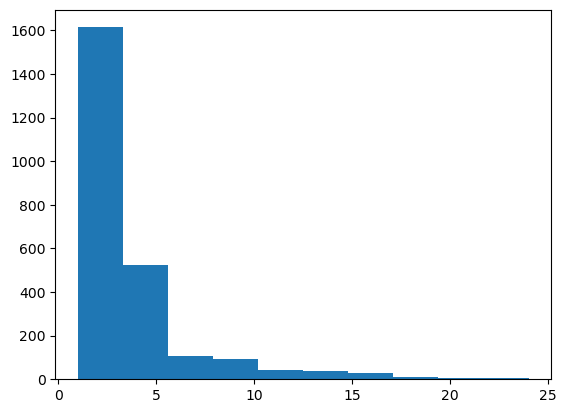

In [30]:
plt.hist(df['TOTAL EXP'])

(array([2.167e+03, 1.510e+02, 5.900e+01, 3.400e+01, 3.300e+01, 7.000e+00,
        2.000e+00, 5.000e+00, 7.000e+00, 5.000e+00]),
 array([ 40001. ,  74812.1, 109623.2, 144434.3, 179245.4, 214056.5,
        248867.6, 283678.7, 318489.8, 353300.9, 388112. ]),
 <BarContainer object of 10 artists>)

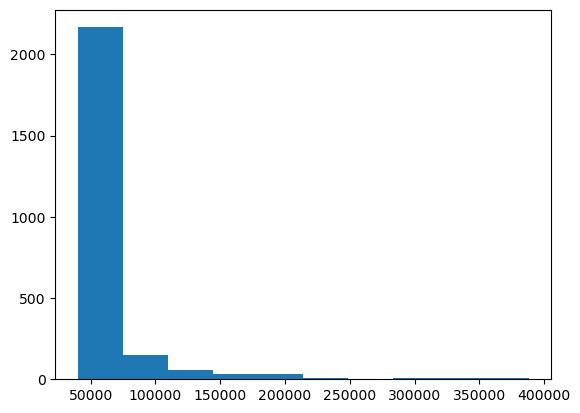

In [31]:
plt.hist(df['SALARY'])

In [32]:
df.shape

(2470, 15)

<Axes: xlabel='TOTAL EXP', ylabel='UNIT'>

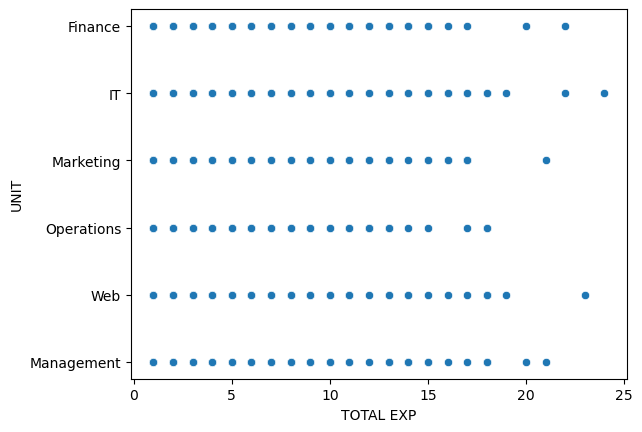

In [33]:
sns.scatterplot(
    data=df,
    x='TOTAL EXP', y="UNIT")

In [34]:
df.drop(['FIRST NAME','LAST NAME','DOJ','CURRENT DATE'], axis=1, inplace=True)

In [35]:
df

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,EXP,TOTAL EXP
0,F,Analyst,21,44570,Finance,24,6,2,0,2,2
2,F,Analyst,21,40955,Finance,23,7,3,0,1,1
3,F,Analyst,22,45550,IT,22,8,3,0,3,3
6,M,Analyst,22,40339,Marketing,19,11,5,0,2,2
8,F,Senior Analyst,28,63478,Operations,20,10,3,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
2634,F,Senior Manager,36,185977,Management,15,15,5,10,5,15
2635,F,Analyst,23,45758,IT,17,13,2,0,2,2
2636,F,Analyst,21,47315,Web,29,1,5,0,2,2
2637,F,Analyst,24,45172,Web,23,7,3,1,2,3


In [36]:
X=df[['SEX','DESIGNATION','AGE','UNIT','RATINGS','TOTAL EXP']]
y=df[['SALARY']]

In [37]:
df_num=X.select_dtypes(exclude='object').columns
df_cat=X.select_dtypes(include='object').columns

In [38]:
df_num

Index(['AGE', 'RATINGS', 'TOTAL EXP'], dtype='object')

In [39]:
df_cat


Index(['SEX', 'DESIGNATION', 'UNIT'], dtype='object')

In [40]:
numeric_pipe=Pipeline(steps=[('scaler',RobustScaler())])


In [41]:
cat_pipe=Pipeline(steps=[('encoder',OneHotEncoder(handle_unknown='ignore'))])

In [42]:
preprocessor=ColumnTransformer(transformers=[('numerical',numeric_pipe, df_num),
                               ('categorical',cat_pipe,df_cat)])

In [43]:
X_train,X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [44]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor)])

X_train=pipe.fit_transform(X_train)
X_test=pipe.transform(X_test)


In [45]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2_score:', r2_score(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred))


MAE: 4080.0430297784487
MSE: 61050198.88779746
RMSE: 7813.462669508152
R2_score: 0.9529847328429769
MAPE: 0.06320477498234277


In [46]:
accuracies_linear = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print(accuracies_linear)
print('Mean accuracy CV:',accuracies_linear.mean())
print('Standard deviation of CV:',accuracies_linear.std())

[0.96052836 0.91874616 0.97746722 0.93162053 0.95591529 0.97438718
 0.94865398 0.93374261 0.95676723 0.95086727]
Mean accuracy CV: 0.9508695824673694
Standard deviation of CV: 0.017648590781229316


In [47]:
model1=DecisionTreeRegressor()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
print('MAE:',mean_absolute_error(y_test, y_pred1))
print('MSE:', mean_squared_error(y_test, y_pred1))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred1)))
print('R2_score:', r2_score(y_test, y_pred1))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred1))

MAE: 5235.02013045434
MSE: 92422793.74635914
RMSE: 9613.67743095009
R2_score: 0.928824435979814
MAPE: 0.07580112272546358


In [48]:
accuracies_dec = cross_val_score(estimator = model1, X = X_train, y = y_train, cv = 10)
print(accuracies_dec)
print('Mean accuracy CV:',accuracies_dec.mean())
print('Standard deviation of CV:',accuracies_dec.std())

[0.96639395 0.90375069 0.94540526 0.95485964 0.89771742 0.9143844
 0.91645256 0.8341117  0.96348469 0.91145971]
Mean accuracy CV: 0.9208020026793552
Standard deviation of CV: 0.037619031523685856


In [49]:
model2=RandomForestRegressor()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
print('MAE:',mean_absolute_error(y_test, y_pred2))
print('MSE:', mean_squared_error(y_test, y_pred2))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred2)))
print('R2_score:', r2_score(y_test, y_pred2))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred2))

MAE: 4304.49302168851
MSE: 65699704.70361269
RMSE: 8105.535435960582
R2_score: 0.9494041096499151
MAPE: 0.06662832122102536


In [50]:
accuracies_rndm = cross_val_score(estimator = model2, X = X_train, y = y_train, cv = 10)
print(accuracies_rndm)
print('Mean accuracy CV:',accuracies_rndm.mean())
print('Standard deviation of CV:',accuracies_rndm.std())

[0.96471999 0.93352568 0.96648922 0.94494507 0.9559138  0.94509045
 0.93379192 0.89422524 0.95740709 0.94220202]
Mean accuracy CV: 0.9438310473711115
Standard deviation of CV: 0.01988276654682137


In [51]:
model3=GradientBoostingRegressor()
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
print('MAE:',mean_absolute_error(y_test, y_pred3))
print('MSE:', mean_squared_error(y_test, y_pred3))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred3)))
print('R2_score:', r2_score(y_test, y_pred3))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred3))

MAE: 4146.596327302489
MSE: 60829108.68568386
RMSE: 7799.301807577641
R2_score: 0.9531549962509189
MAPE: 0.06371850213317666


In [52]:
accuracies_grad = cross_val_score(estimator = model3, X = X_train, y = y_train, cv = 10)
print(accuracies_grad)
print('Mean accuracy CV:',accuracies_grad.mean())
print('Standard deviation of CV:',accuracies_grad.std())

[0.96221267 0.88748303 0.95287075 0.93407931 0.95728846 0.94165618
 0.918943   0.81280439 0.95552437 0.94449971]
Mean accuracy CV: 0.9267361859098425
Standard deviation of CV: 0.043448664541901307


In [53]:
model4= Ridge()
param= {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}



In [54]:
ridge_grid = GridSearchCV(estimator=model4,
                        param_grid=param,
                        cv=10)

ridge_grid_fit = ridge_grid.fit(X_train, y_train)

In [55]:
print('\n The Best Parameters are : ')
print(ridge_grid_fit.best_params_)


 The Best Parameters are : 
{'alpha': 0.1}


In [72]:
model4= Ridge(alpha= 0.1)
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
print('MAE:',round(mean_absolute_error(y_test, y_pred4),2))
print('MSE:', round(mean_squared_error(y_test, y_pred4),2))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test, y_pred4)),2))
print('R2_score:', round(r2_score(y_test, y_pred4),2))
print('MAPE:',round(mean_absolute_percentage_error(y_test, y_pred4),2))

MAE: 4071.13
MSE: 61037013.49
RMSE: 7812.62
R2_score: 0.95
MAPE: 0.06


In [57]:
model2= RandomForestRegressor()
param= {'n_estimators':[100, 150,200],
        'criterion' :['squared_error','friedman_mse'],
        'max_depth' :['None',3],
        'min_samples_split' :[2,4],
        'min_samples_leaf':[3,5]}




In [58]:
rndm_grid = GridSearchCV(estimator=model2,
                        param_grid=param,
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True)

rndm_grid_fit = rndm_grid.fit(X_train, y_train)

In [59]:
print('\n The Best Parameters are : ')
print(rndm_grid_fit.best_params_)


 The Best Parameters are : 
{'criterion': 'friedman_mse', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 150}


In [60]:
model2= RandomForestRegressor(criterion= 'friedman_mse', max_depth= 3, min_samples_leaf= 3, min_samples_split= 4, n_estimators= 100)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
print('MAE:',mean_absolute_error(y_test, y_pred2))
print('MSE:', mean_squared_error(y_test, y_pred2))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred2)))
print('R2_score:', r2_score(y_test, y_pred2))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred2))

MAE: 4289.047445922815
MSE: 63928833.80901972
RMSE: 7995.550875894651
R2_score: 0.9507678720901146
MAPE: 0.06523935519386444


In [61]:
y_pred4

array([[ 45164.9036428 ],
       [126248.51912975],
       [292215.86739051],
       [ 45361.02445676],
       [ 45361.02445676],
       [ 45687.93647284],
       [ 45202.00525131],
       [ 87231.86869655],
       [ 45267.90865768],
       [ 44856.3303935 ],
       [ 45033.1063316 ],
       [ 45449.24597512],
       [ 45075.77197282],
       [ 44958.17127631],
       [ 45431.33950213],
       [ 45038.57440685],
       [ 87296.17924206],
       [ 44821.42935721],
       [ 45034.78219267],
       [ 44477.29235849],
       [ 44876.96090606],
       [ 87859.6735761 ],
       [ 45654.72303598],
       [ 44558.88166953],
       [125289.89670446],
       [ 45237.56900073],
       [ 45301.12209454],
       [ 88415.25009102],
       [ 45262.96404978],
       [ 87390.88790201],
       [ 45732.44509838],
       [ 88405.4112024 ],
       [ 45102.40698524],
       [ 44854.64279408],
       [ 87813.2157207 ],
       [ 45765.65853525],
       [ 44780.43957706],
       [ 45237.56900073],
       [ 453

In [62]:
model4

Ridge(alpha=0.1)

In [63]:
joblib.dump(model4,"RidgeModel.pkl")

['RidgeModel.pkl']

In [64]:
my_model_loaded = joblib.load("RidgeModel.pkl")

In [65]:
R2_score=r2_score(y_test, my_model_loaded.predict(X_test))

In [66]:
R2_score

0.9529948870294623

In [67]:
!pip install FastAPI

In [68]:
!pip install uvicorn

In [73]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import uvicorn
import nest_asyncio
import threading
from threading import Thread

In [74]:
class PredictionRequest(BaseModel):
    input1: int
    input2: int
    input3: int
    input4: int
    input5: float
    input6: int

model = joblib.load("RidgeModel.pkl")
app=FastAPI()

@app.get("/")
def read_root():
    return {"message": "Welcome to the Ridge Regression Model API"}


@app.post("/predict/")
def predict(request: PredictionRequest):
    input_data = [[data.input1,data.input2,data.input3,data.input4,data.input5,data.input6]]
    prediction = model.predict(input_data)[0]
    return {"prediction": prediction.tolist()}

In [75]:

def run():
    uvicorn.run(app, host='127.0.0.1', port=8004)


server_thread = Thread(target=run)
server_thread.start()

INFO:     Started server process [21740]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8004 (Press CTRL+C to quit)
